In [1]:
import sys
import inspect
import os
import sys
from operator import itemgetter
from functools import reduce
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import numpy as np
import pandas as pd
from numpy.linalg import norm
from IPython.display import display, HTML
from collections import defaultdict
from scipy import stats 


currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0, parentdir)

from pypackage.flexfringe.utils import preprocess_bidirectional_data, rolling_window, lists_identical, netflow_encoding, \
    find_percentile, date_diff, split_data, remove_background, foo, split_data2

In [2]:
ip_dict = {}

# IPs for scenario 42
infected_ips = ['147.32.84.165']
normal_ips = ['147.32.84.170', '147.32.84.134', '147.32.84.164', '147.32.87.36', '147.32.80.9', '147.32.87.11']

ip_dict['scenario_42'] = {}
ip_dict['scenario_42']['infected_ips'] = infected_ips
ip_dict['scenario_42']['normal_ips'] = normal_ips

# IPs for scenario 43
infected_ips = ['147.32.84.165']
normal_ips = ['147.32.84.170', '147.32.84.164', '147.32.87.36', '147.32.80.9', '147.32.87.11']

ip_dict['scenario_43'] = {}
ip_dict['scenario_43']['infected_ips'] = infected_ips
ip_dict['scenario_43']['normal_ips'] = normal_ips

# IPs for scenario 44
infected_ips = ['147.32.84.165']
normal_ips = ['147.32.84.170', '147.32.84.134', '147.32.84.164', '147.32.87.36', '147.32.80.9', '147.32.87.11']

ip_dict['scenario_44'] = {}
ip_dict['scenario_44']['infected_ips'] = infected_ips
ip_dict['scenario_44']['normal_ips'] = normal_ips

# IPs for scenario 45
infected_ips = ['147.32.84.165']
normal_ips = ['147.32.84.170', '147.32.84.134', '147.32.84.164', '147.32.87.36', '147.32.80.9', '147.32.87.11']

ip_dict['scenario_45'] = {}
ip_dict['scenario_45']['infected_ips'] = infected_ips
ip_dict['scenario_45']['normal_ips'] = normal_ips

# IPs for scenario 46
infected_ips = ['147.32.84.165']
normal_ips = ['147.32.84.170', '147.32.84.134', '147.32.84.164', '147.32.87.36', '147.32.80.9', '147.32.87.11']

ip_dict['scenario_46'] = {}
ip_dict['scenario_46']['infected_ips'] = infected_ips
ip_dict['scenario_46']['normal_ips'] = normal_ips

# IPs for scenario 47
infected_ips = ['147.32.84.165']
normal_ips = ['147.32.84.170', '147.32.84.134', '147.32.84.164', '147.32.87.36', '147.32.80.9', '147.32.87.11']

ip_dict['scenario_47'] = {}
ip_dict['scenario_47']['infected_ips'] = infected_ips
ip_dict['scenario_47']['normal_ips'] = normal_ips

# IPs for scenario 48
infected_ips = ['147.32.84.165']
normal_ips = ['147.32.84.170', '147.32.84.134', '147.32.84.164', '147.32.87.36', '147.32.80.9']

ip_dict['scenario_48'] = {}
ip_dict['scenario_48']['infected_ips'] = infected_ips
ip_dict['scenario_48']['normal_ips'] = normal_ips

# IPs for scenario 49
infected_ips = ['147.32.84.165']
normal_ips = ['147.32.84.170', '147.32.84.134', '147.32.84.164', '147.32.87.36', '147.32.80.9', '147.32.87.11']

ip_dict['scenario_49'] = {}
ip_dict['scenario_49']['infected_ips'] = infected_ips
ip_dict['scenario_49']['normal_ips'] = normal_ips

# IPs for scenario 50
infected_ips = ['147.32.84.165', '147.32.84.191', '147.32.84.192', '147.32.84.193', '147.32.84.204',
                '147.32.84.205', '147.32.84.206', '147.32.84.207', '147.32.84.208', '147.32.84.209']
normal_ips = ['147.32.84.170', '147.32.84.134', '147.32.84.164', '147.32.87.36', '147.32.80.9', '147.32.87.11']

ip_dict['scenario_50'] = {}
ip_dict['scenario_50']['infected_ips'] = infected_ips
ip_dict['scenario_50']['normal_ips'] = normal_ips

# IPs for scenario 51
normal_ips = ['147.32.84.170', '147.32.84.134', '147.32.84.164', '147.32.87.36', '147.32.80.9', '147.32.87.11']
infected_ips = ['147.32.84.165', '147.32.84.191', '147.32.84.192', '147.32.84.193', '147.32.84.204',
                '147.32.84.205', '147.32.84.206', '147.32.84.207', '147.32.84.208', '147.32.84.209']

ip_dict['scenario_51'] = {}
ip_dict['scenario_51']['infected_ips'] = infected_ips
ip_dict['scenario_51']['normal_ips'] = normal_ips

# IPs for scenario 52
infected_ips = ['147.32.84.165', '147.32.84.191', '147.32.84.192']
normal_ips = ['147.32.84.170', '147.32.84.134', '147.32.84.164', '147.32.87.36', '147.32.80.9', '147.32.87.11']

ip_dict['scenario_52'] = {}
ip_dict['scenario_52']['infected_ips'] = infected_ips
ip_dict['scenario_52']['normal_ips'] = normal_ips

# IPs for scenario 53
infected_ips = ['147.32.84.165', '147.32.84.191', '147.32.84.192']
normal_ips = ['147.32.84.170', '147.32.84.134', '147.32.84.164', '147.32.87.36', '147.32.80.9', '147.32.87.11']

ip_dict['scenario_53'] = {}
ip_dict['scenario_53']['infected_ips'] = infected_ips
ip_dict['scenario_53']['normal_ips'] = normal_ips

# IPs for scenario 54
infected_ips = ['147.32.84.165']
normal_ips = ['147.32.84.170', '147.32.84.134', '147.32.84.164', '147.32.87.36', '147.32.80.9', '147.32.87.11']

ip_dict['scenario_54'] = {}
ip_dict['scenario_54']['infected_ips'] = infected_ips
ip_dict['scenario_54']['normal_ips'] = normal_ips

In [3]:
def count_all_flows_bidirectional_data(filepath):
    with open(filepath, 'r') as f:
        lines = f.readlines()
    return len(lines)-1

In [4]:
def get_dataset_size(dataset):
    dataset_dir = '../data/ctu/'
    size_in_bytes = os.path.getsize(dataset_dir + dataset)
    size_in_mb = size_in_bytes/(1024*1024)
    return size_in_mb

In [5]:
def read_and_process_data(dataset):
    dataset_dir = '../data/ctu/'
    
    if os.path.exists(dataset_dir + 'no_background_' + dataset + '.pkl'):
        data = pd.read_pickle(
            dataset_dir + 'no_background_' + dataset + '.pkl')  # if the data without the background are there, load them

    else:
        # read the data in chunks due to their large size - uncomment the following lines if you want to read them again
        # and store them in a pickle
        preprocess_bidirectional_data(dataset_dir + dataset)
        dateparse = lambda x: pd.datetime.strptime(x, '%Y/%m/%d %H:%M:%S.%f')
        data = pd.concat(
            remove_background(chunk) for chunk in pd.read_csv(dataset_dir + dataset + '_v2',
                                                              chunksize=100000, delimiter=',',
                                                              parse_dates=['date'], date_parser=dateparse))
        data.to_pickle(dataset_dir + 'no_background_' + dataset + '.pkl')

        # ## Initial preprocessing of the data
        # resetting indices for data
    data = data.reset_index(drop=True)
    dates = data['date'].tolist()
    time_diff = [int(abs(date_diff(s, t))) for s, t in zip(dates[1:], dates)]
    time_diff = [np.mean(time_diff)] + time_diff
    # parse packets and bytes as integers instead of strings
    data['time_diff'] = time_diff
    # parse packets and bytes as integers instead of strings
    data['packets'] = data['packets'].astype(int)
    data['duration'] = data['duration'].astype(float)
    data['src_bytes'] = data['src_bytes'].astype(int)
    data['dst_bytes'] = data['dst_bytes'].astype(int)
    data['total_bytes'] = data['total_bytes'].astype(int)
    data['time_diff'] =  data['time_diff'].astype(int)
    # add the numerical representation of the categorical data
    data['protocol_num'] = pd.Categorical(data['protocol'], categories=data['protocol'].unique()).codes
    # data['state_num'] = pd.Categorical(data['state'], categories=data['state'].unique()).codes
    data['direction_num'] = pd.Categorical(data['direction'], categories=data['direction'].unique()).codes

    return data

In [6]:
data = {}
scenarios = range(42,55)
for s in scenarios:
    dataset = 'CTU-Malware-Capture-Botnet-{}'.format(s)
    data[s] = read_and_process_data(dataset)


In [7]:
# data[50].head
s = 50
nips = ip_dict['scenario_50']['normal_ips']
df = data[s]
unique_src =df[df['label']=='Normal']['src_ip'].unique().tolist()
# unique_src =df[df['src_ip'].isin(nips)]['src_ip'].unique().tolist()

print(len(unique_src))
# unique_dst =data[s]['dst_ip'].unique().tolist()
# len(list(set(unique_dst+unique_src)))

25


In [8]:
for s in range(51,54):
    df = data[s]
    groups =df[df['label']=='Normal'].groupby(['src_ip'])
    print(len(groups))
# [(n, len(g)) for n, g in groups]
    

18
15
14


In [9]:
scenarios = range(42,55)
for s in scenarios:
    dataset_dir = '../data/ctu/'
    infected_ips = ip_dict['scenario_{}'.format(s)]['infected_ips']
    normal_ips = ip_dict['scenario_{}'.format(s)]['normal_ips']
    dataset = 'CTU-Malware-Capture-Botnet-{}'.format(s)
    no_background_data = data[s]
    with_background_flows = count_all_flows_bidirectional_data(dataset_dir + dataset)
    
    print("Scenario: ", str(s-41))
    all_flows = with_background_flows
    other_flows = len(no_background_data)
    backgound_flows = all_flows - other_flows
    background_flows_percentage = round(backgound_flows*100/all_flows, 2)
    print("All flows: ", str(all_flows))
    
    print("Background flows: ", str(backgound_flows), "({:.2f}%)".format(background_flows_percentage))

    infected = no_background_data[no_background_data['src_ip'].isin(infected_ips)] 
    infected = infected.reset_index()

    normal= no_background_data[~no_background_data['src_ip'].isin(infected_ips)]
    normal = normal.reset_index()
    
    normal_flows = len(normal)
    normal_flows_percentage = round(normal_flows*100/all_flows, 2)
    infected_flows = len(infected)
    infected_flows_percentage = round(infected_flows*100/all_flows, 2)

    
    print("Normal flows: ", str(normal_flows), "({:.2f}%)".format(normal_flows_percentage))
    print("Botnet flows: ", str(infected_flows), "({:.2f}%)".format(infected_flows_percentage))
    
    normal_hosts = len(normal['src_ip'].unique().tolist())
    infected_hosts = len(infected_ips)
    
    print("Normal hosts: ", str(normal_hosts))
    print("Botnet hosts: ", str(infected_hosts))
    
    packets = no_background_data['packets'].sum()
    print('Packets: ', str(packets))
    
    start = no_background_data.loc[no_background_data.index[-1], 'date']
    end = no_background_data.loc[0, 'date']
    duration = (start-end).total_seconds()/3600
    print('Duration: {:.2f} hours'.format(duration))
    
#     size_in_mb = get_dataset_size(dataset)
#     print('Size: {:.2f} MB'.format(size_in_mb), "\n\n")
    size_in_gb = no_background_data['total_bytes'].sum()/(1024*1024*1024) 
    print('Size: {:.2f} GB'.format(size_in_gb), "\n\n")

Scenario:  1
All flows:  2824636
Background flows:  2753288 (97.47%)
Normal flows:  30387 (1.08%)
Botnet flows:  40961 (1.45%)
Normal hosts:  19
Botnet hosts:  1
Packets:  1115476
Duration: 6.12 hours
Size: 0.75 GB 


Scenario:  2
All flows:  1808122
Background flows:  1778061 (98.34%)
Normal flows:  9120 (0.50%)
Botnet flows:  20941 (1.16%)
Normal hosts:  14
Botnet hosts:  1
Packets:  247622
Duration: 4.19 hours
Size: 0.06 GB 


Scenario:  3
All flows:  4710638
Background flows:  4566929 (96.95%)
Normal flows:  116950 (2.48%)
Botnet flows:  26759 (0.57%)
Normal hosts:  24
Botnet hosts:  1
Packets:  1025399
Duration: 66.82 hours
Size: 0.40 GB 


Scenario:  4
All flows:  1121076
Background flows:  1093228 (97.52%)
Normal flows:  25268 (2.25%)
Botnet flows:  2580 (0.23%)
Normal hosts:  22
Botnet hosts:  1
Packets:  1544016
Duration: 4.19 hours
Size: 1.31 GB 


Scenario:  5
All flows:  129832
Background flows:  124252 (95.70%)
Normal flows:  4679 (3.60%)
Botnet flows:  901 (0.69%)
Normal 

## Spikes in flow frequency

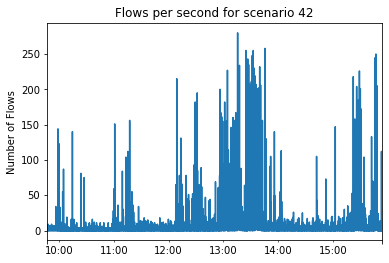

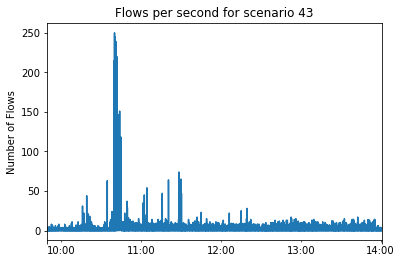

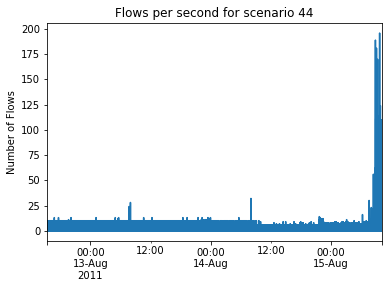

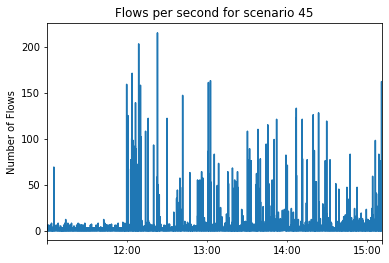

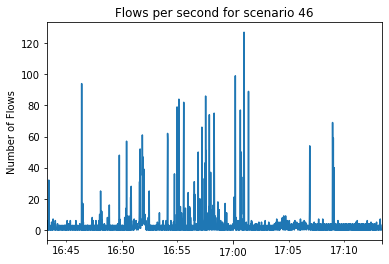

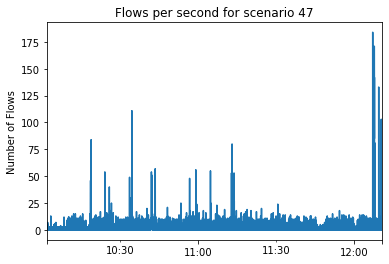

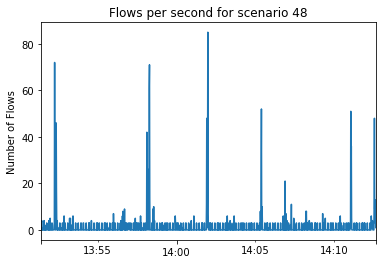

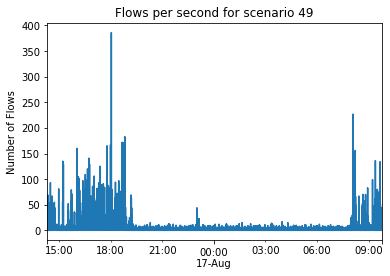

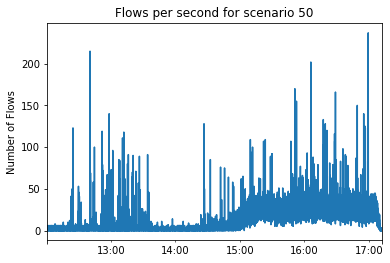

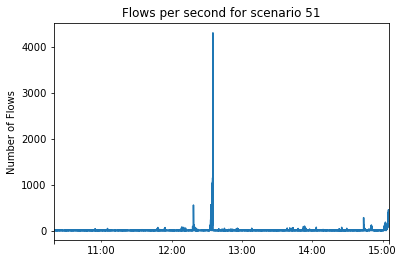

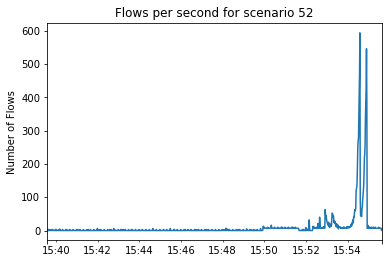

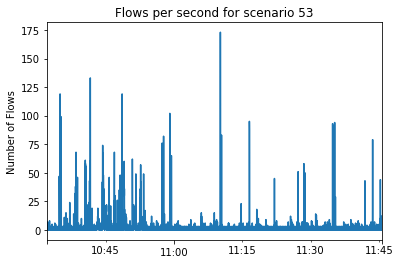

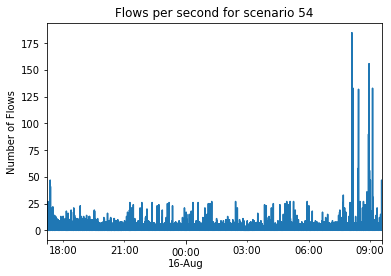

In [10]:
s = 42
for s in scenarios:
    plt.figure()
    no_background_data = data[s]
    # no_background_data.groupby(['date']).size()
    # no_background_data['date'].groupby(pd.Grouper(freq='M')).size()
    no_background_data = no_background_data.set_index(['date'])
    flows_per_5min = no_background_data.groupby(pd.Grouper(freq='s')).size()
    ax = flows_per_5min.plot(title='Flows per second for scenario {}'.format(s))
    ax.set_xlabel("")
    ax.set_ylabel("Number of Flows")
    plt.savefig('FpS_scenario_{}.png'.format(s),bbox='tight')

In [11]:
for s in scenarios:
    no_background_data = data[s]
    infected_ips = ip_dict['scenario_{}'.format(s)]['infected_ips']
    normal_ips = ip_dict['scenario_{}'.format(s)]['normal_ips']

    infected_flows = []
    normal_flows = []
    for ip in infected_ips:
        d = no_background_data[no_background_data['src_ip']==ip]
        infected_flows += [len(d)]
    for ip in normal_ips:
        d = no_background_data[no_background_data['src_ip']==ip]
        normal_flows += [len(d)]
    print('Botnets')
    print(stats.describe(infected_flows))
    print('Median: ',np.median(infected_flows), '\n')


    print('Normal')
    print(stats.describe(normal_flows))
    print('Median: ',np.median(normal_flows), '\n\n')
    

Botnets
DescribeResult(nobs=1, minmax=(40961, 40961), mean=40961.0, variance=nan, skewness=0.0, kurtosis=-3.0)
Median:  40961.0 

Normal
DescribeResult(nobs=6, minmax=(6, 18438), mean=5043.0, variance=52106523.2, skewness=1.200322809940783, kurtosis=0.006387135315809811)
Median:  2038.5 


Botnets
DescribeResult(nobs=1, minmax=(20941, 20941), mean=20941.0, variance=nan, skewness=0.0, kurtosis=-3.0)
Median:  20941.0 

Normal
DescribeResult(nobs=5, minmax=(3, 8960), mean=1816.4, variance=15947814.800000004, skewness=1.4998542353259319, kurtosis=0.24980499214792395)
Median:  25.0 


Botnets
DescribeResult(nobs=1, minmax=(26759, 26759), mean=26759.0, variance=nan, skewness=0.0, kurtosis=-3.0)
Median:  26759.0 

Normal
DescribeResult(nobs=6, minmax=(14, 108807), mean=19383.833333333332, variance=1921976415.766667, skewness=1.7830205988739447, kurtosis=1.1893574128828304)
Median:  1405.0 




C:\Users\skoul\AppData\Roaming\Python\Python38\site-packages\numpy\core\fromnumeric.py:3583: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\skoul\AppData\Roaming\Python\Python38\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Botnets
DescribeResult(nobs=1, minmax=(2580, 2580), mean=2580.0, variance=nan, skewness=0.0, kurtosis=-3.0)
Median:  2580.0 

Normal
DescribeResult(nobs=6, minmax=(4, 12133), mean=4199.166666666667, variance=31482558.166666664, skewness=0.6519457605620799, kurtosis=-1.4426753461766662)
Median:  1281.5 


Botnets
DescribeResult(nobs=1, minmax=(901, 901), mean=901.0, variance=nan, skewness=0.0, kurtosis=-3.0)
Median:  901.0 

Normal
DescribeResult(nobs=6, minmax=(2, 1810), mean=776.6666666666666, variance=769558.2666666668, skewness=0.19998264249038314, kurtosis=-1.782728327039165)
Median:  560.5 


Botnets
DescribeResult(nobs=1, minmax=(4630, 4630), mean=4630.0, variance=nan, skewness=0.0, kurtosis=-3.0)
Median:  4630.0 

Normal
DescribeResult(nobs=6, minmax=(2, 5488), mean=1245.1666666666667, variance=4566442.5666666655, skewness=1.586505887646796, kurtosis=0.8090913566550033)
Median:  358.0 


Botnets
DescribeResult(nobs=1, minmax=(63, 63), mean=63.0, variance=nan, skewness=0.0, kurto

{'whiskers': [<matplotlib.lines.Line2D at 0xfc0730>,
 'caps': [<matplotlib.lines.Line2D at 0xfc0a90>,
 'boxes': [<matplotlib.lines.Line2D at 0xfc0580>,
 'medians': [<matplotlib.lines.Line2D at 0xfc0df0>,
 'fliers': [],
 'means': []}

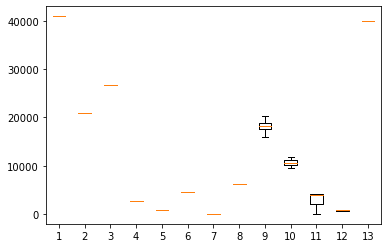

In [12]:
total_normal_flows = []
total_infected_flows = []

for s in scenarios:
    no_background_data = data[s]
    infected_ips = ip_dict['scenario_{}'.format(s)]['infected_ips']
    normal_ips = ip_dict['scenario_{}'.format(s)]['normal_ips']

    infected_flows = []
    normal_flows = []
    for ip in infected_ips:
        d = no_background_data[no_background_data['src_ip']==ip]
        infected_flows += [len(d)]
    for ip in normal_ips:
        d = no_background_data[no_background_data['src_ip']==ip]
        normal_flows += [len(d)]
    total_infected_flows += [infected_flows]
    total_normal_flows += [normal_flows]
    
# sns.boxplot(total_infected_flows)
plt.boxplot(total_infected_flows, showfliers=False)
# plt.boxplot(total_normal_flows, showfliers=False)


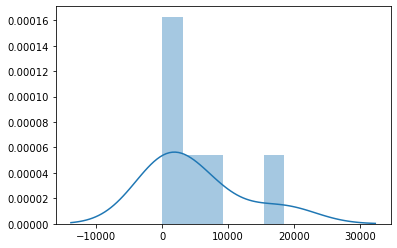

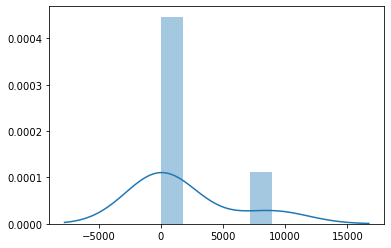

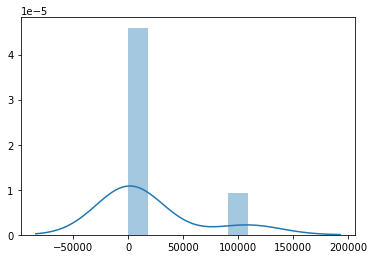

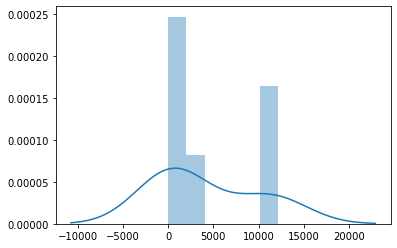

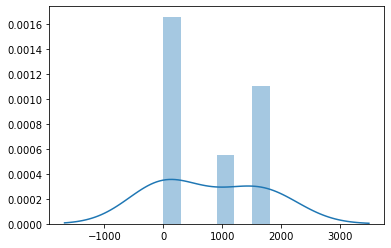

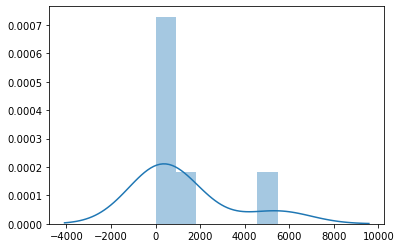

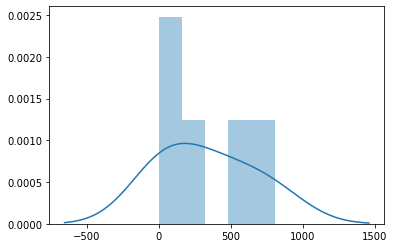

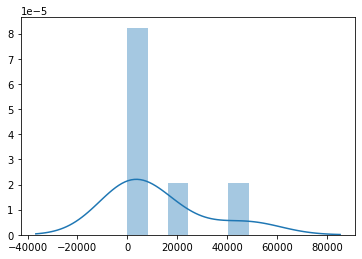

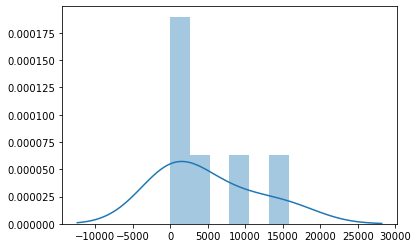

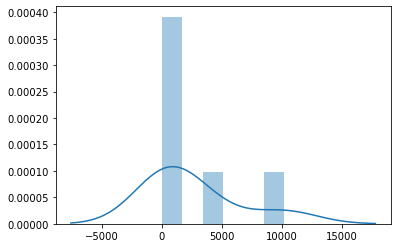

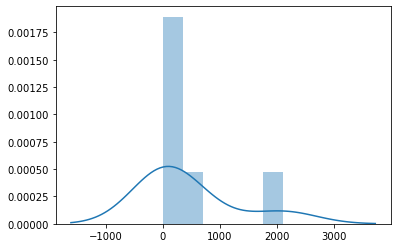

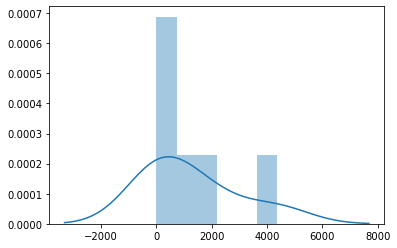

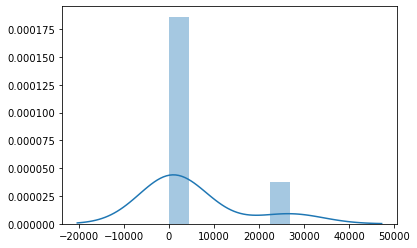

In [13]:
for s in scenarios:
    no_background_data = data[s]
    infected_ips = ip_dict['scenario_{}'.format(s)]['infected_ips']
    normal_ips = ip_dict['scenario_{}'.format(s)]['normal_ips']

    infected_flows = []
    normal_flows = []
    for ip in infected_ips:
        d = no_background_data[no_background_data['src_ip']==ip]
        infected_flows += [len(d)]
    for ip in normal_ips:
        d = no_background_data[no_background_data['src_ip']==ip]
        normal_flows += [len(d)]
    fig = plt.figure()
    sns.distplot(normal_flows, bins=len(normal_flows), hist=True, kde=True)

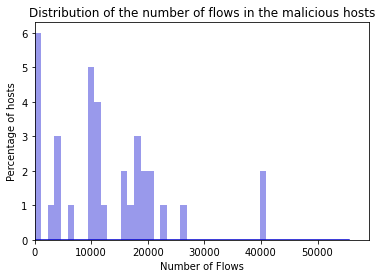

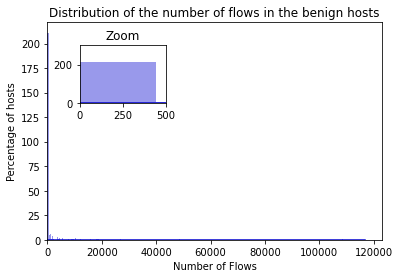

In [38]:
total_normal_flows = []
total_infected_flows = []

for s in scenarios:
    no_background_data = data[s]
    infected_ips = ip_dict['scenario_{}'.format(s)]['infected_ips']
#     normal_ips = ip_dict['scenario_{}'.format(s)]['normal_ips']
    normal_ips =no_background_data[no_background_data['label']=='Normal']['src_ip'].unique().tolist()


    infected_flows = []
    normal_flows = []
    for ip in infected_ips:
        d = no_background_data[no_background_data['src_ip']==ip]
        infected_flows += [len(d)]
    for ip in normal_ips:
        d = no_background_data[no_background_data['src_ip']==ip]
        normal_flows += [len(d)]
    total_infected_flows += infected_flows
    total_normal_flows += normal_flows
    
# sns.distplot(total_normal_flows, bins=len(total_normal_flows), hist=True, kde=True)
# sns.distplot(total_normal_flows)
# plt.figure()
fig = plt.figure()
ax = fig.add_subplot()
sns.distplot(total_infected_flows, bins=len(total_infected_flows),color='mediumblue',hist_kws={'density':False}).set(xlim=(0))
ax.set(xlabel='Number of Flows', ylabel='Percentage of hosts')
ax.set_title('Distribution of the number of flows in the malicious hosts')
plt.savefig('infected_histogram.png'.format(s),bbox='tight')


fig = plt.figure()
ax = fig.add_subplot()
sns.distplot(total_normal_flows,bins=len(total_normal_flows),color='mediumblue',hist_kws={'density':False}).set(xlim=(0))
ax.set(xlabel='Number of Flows', ylabel='Percentage of hosts')
ax.set_title('Distribution of the number of flows in the benign hosts')

ax2 = plt.axes([0.2, 0.6, .2, .2])
sns.distplot(total_normal_flows,bins=len(total_normal_flows),color='mediumblue',hist_kws={'density':False},ax=ax2).set(xlim=(0))
ax2.set_title('Zoom')
ax2.set_xlim([0,500])
ax2.set_ylim([0,300])


plt.savefig('normal_histogram.png'.format(s),bbox='tight')
# fig = plt.figure()

# ,hist_kws={'range':(0,max(total_infected_flows))}

# plt.hist(total_normal_flows, bins=len(total_normal_flows), density=True)
# plt.show()
# plt.hist(total_infected_flows, bins=len(total_infected_flows), density=True)
# x = np.linspace(0,max(total_infected_flows)) 
# h = plt.plot(x, total_infected_flows, lw=2)
# plt.show()

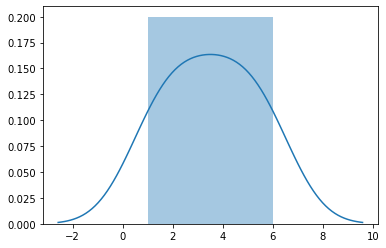

In [16]:
x = np.random.randn(100)
x = [1,2,3,4,5,6]
ax = sns.distplot(x)

In [17]:
x

[1, 2, 3, 4, 5, 6]